# Bristol City Council Land and Building Assets challenge
## Unit 2 Problem Definition and Suggested Solutions

# Useful links
## Data source
*Bristol City Council Land and Building Assets*

https://www.data.gov.uk/dataset/a98345ad-7f4c-4f6e-882b-e631dc1cc046/bristol-city-council-land-and-building-assets

*Bristol dataset*

https://www.bristol.gov.uk/files/documents/7241-land-property-2023/file

## Useful programming references
*Various Spark examples*

https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/

https://spark.apache.org/examples.html

https://github.com/apache/spark/tree/master/examples/src/main/python

*OReilly's Learning Spark reference*

https://www.oreilly.com/library/view/learning-spark-2nd/9781492050032/ch04.html

*Recipe Objective - Explain StructType and StructField in PySpark*

https://www.projectpro.io/recipes/explain-structtype-and-structfield-pyspark-databricks#:~:text=The%20StructField%20in%20PySpark%20represents,the%20name%20of%20the%20StructField

*SPARK StructTypes*

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.types.StructType.html#:~:text=.StructType%5Bsource%5D-,Construct%20a%20StructType%20by%20adding%20new%20elements%20to%20it%2C%20to,)%2C%20metadata(optional)

In [2]:
# Load CSV - can be from a standalone local file, or online file source - here is is a local file in storage blob
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType 
from pyspark.sql.types import DoubleType, BooleanType, DateType, LongType, FloatType

# Using custom schema
schema =  StructType() \
      .add("Organisation Name", StringType(), True) \
      .add("Organisation Code", StringType(), True) \
      .add("Effective Date", DateType(), True) \
      .add("UPRN", StringType(), True) \
      .add("Property ID", IntegerType(), True) \
      .add("Property Type", StringType(), True) \
      .add("Property Name/Address (Where no UPRN)", StringType(), True) \
      .add("Property Address Detail", StringType(), True) \
      .add("Secondary Address Detail", StringType(), True) \
      .add("Street Number", StringType(), True) \
      .add("Street", StringType(), True) \
      .add("Town / Post Town", StringType(), True) \
      .add("Post Code", StringType(), True) \
      .add("Ward", StringType(), True) \
      .add("Geo X (Easting)", LongType(), True) \
      .add("Geo Y (Northing)", LongType(), True) \
      .add("Tenure Type", StringType(), True) \
      .add("Ground Lease In", StringType(), True) \
      .add("Ground Lease Out", StringType(), True) \
      .add("Lease In to Council", StringType(), True) \
      .add("Lease Out", StringType(), True) \
      .add("Licence In to Council", StringType(), True) \
      .add("Licence Out", StringType(), True) \
      .add("Sub-lease In to Council", StringType(), True) \
      .add("Sub-lease Out", StringType(), True) \
      .add("Vacant", StringType(), True) \
      .add("Asset Type", StringType(), True) \
      .add("Building Size - GIA (M2)", FloatType(), True) \
      .add("Site Area (Hectares)", FloatType(), True) \
      .add("Occupied by Council / Direct Service Property", StringType(), True) \
      .add("Purpose / Asset Category", StringType(), True)
      
df = spark.read.format("csv") \
      .options(header="True", inferSchema="False", delimiter=",", dateFormat="d/M/yyyy") \
      .schema(schema) \
      .load("wasb:///HdiSamples/BristolCityCouncilLandAndBuildingAssets-2024.csv")
# WASB = Windows Azure Storage Blob protocol

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
from IPython.display import display
display(df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[Organisation Name: string, Organisation Code: string, Effective Date: date, UPRN: string, Property ID: int, Property Type: string, Property Name/Address (Where no UPRN): string, Property Address Detail: string, Secondary Address Detail: string, Street Number: string, Street: string, Town / Post Town: string, Post Code: string, Ward: string, Geo X (Easting): bigint, Geo Y (Northing): bigint, Tenure Type: string, Ground Lease In: string, Ground Lease Out: string, Lease In to Council: string, Lease Out: string, Licence In to Council: string, Licence Out: string, Sub-lease In to Council: string, Sub-lease Out: string, Vacant: string, Asset Type: string, Building Size - GIA (M2): float, Site Area (Hectares): float, Occupied by Council / Direct Service Property: string, Purpose / Asset Category: string]

In [3]:
# Show schema
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Organisation Name: string (nullable = true)
 |-- Organisation Code: string (nullable = true)
 |-- Effective Date: date (nullable = true)
 |-- UPRN: string (nullable = true)
 |-- Property ID: integer (nullable = true)
 |-- Property Type: string (nullable = true)
 |-- Property Name/Address (Where no UPRN): string (nullable = true)
 |-- Property Address Detail: string (nullable = true)
 |-- Secondary Address Detail: string (nullable = true)
 |-- Street Number: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Town / Post Town: string (nullable = true)
 |-- Post Code: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Geo X (Easting): long (nullable = true)
 |-- Geo Y (Northing): long (nullable = true)
 |-- Tenure Type: string (nullable = true)
 |-- Ground Lease In: string (nullable = true)
 |-- Ground Lease Out: string (nullable = true)
 |-- Lease In to Council: string (nullable = true)
 |-- Lease Out: string (nullable = true)
 |-- Licence In to 

In [4]:
# Show dataframe
df.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+--------------------+--------------+------------+-----------+--------------------+-------------------------------------+-----------------------+------------------------+-------------+---------------+----------------+---------+--------------------+---------------+----------------+-----------+---------------+----------------+-------------------+---------+---------------------+-----------+-----------------------+-------------+------+--------------------+------------------------+--------------------+---------------------------------------------+------------------------+
|Organisation Name|   Organisation Code|Effective Date|        UPRN|Property ID|       Property Type|Property Name/Address (Where no UPRN)|Property Address Detail|Secondary Address Detail|Street Number|         Street|Town / Post Town|Post Code|                Ward|Geo X (Easting)|Geo Y (Northing)|Tenure Type|Ground Lease In|Ground Lease Out|Lease In to Council|Lease Out|Licence In to Council|Licence Out|

In [5]:
# The data is now there ready to use. First let's take the df and create a new virtial HIVE table to query in Spark

# Register the dataframe as a virtual HIVE table to allow SparkSQL
#df.registerTempTable('BristolCouncilAssets') # depracated form of command, nopw replaced with ...
df.createOrReplaceTempView('BristolCouncilAssets')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Problem 1
How many ‘Properties’ are Bristol City Council (BCC) responsible for (as owner, user or manager)?

The problems are all addressed using Spark SQL. Note the use of the 'magic' symbol %%sql

In [6]:
%%sql
SELECT Count(*) AS Count
FROM BristolCouncilAssets

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

,Count
0,3805


# Problem 2
How many unique ‘Property Type’s are Bristol City Council (BCC) responsible for (as owner, user or manager)?

In [7]:
%%sql
SELECT DISTINCT `Property Type` 
FROM BristolCouncilAssets 
ORDER BY `Property Type`

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

,Property Type
0,Access/Right Of Way
1,Agricultural Buildings
2,Block/Blocks Of Flats
3,Bridge/Pontoon
4,Bus Shelter
...,...
103,Training/Community/Further Education
104,Transfer Station
105,Tunnel
106,Underground Store


The above output is broken down to show all the seperate property types - if we just want a total count then we can do as is shown below.

In [8]:
%%sql
SELECT Count(*) AS Count
FROM (SELECT DISTINCT `Property Type` FROM BristolCouncilAssets) types

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

,Count
0,108


# Problem 3
How many properties are there in each of the ‘Property Types’?

In [9]:
%%sql
SELECT `Property Type`, Count(*) AS Count
FROM BristolCouncilAssets 
GROUP BY `Property Type` 
ORDER BY `Property Type`

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

,Property Type,Count
0,Access/Right Of Way,20
1,Agricultural Buildings,2
2,Block/Blocks Of Flats,1
3,Bridge/Pontoon,17
4,Bus Shelter,5
...,...,...
103,Training/Community/Further Education,8
104,Transfer Station,1
105,Tunnel,2
106,Underground Store,3


# Problem 4
Show a histogram classifying the total area (in Ha) of each of these 'property types'

Note the %%sql statement is parametised below to capture the output to a query result 'propertytypes', which can then be used to produce a plot below.

In [10]:
%%sql -q -o propertytypes
SELECT `Property Type`, Sum(`Site Area (Hectares)`) AS Sum
FROM BristolCouncilAssets 
GROUP BY `Property Type` 
ORDER BY Sum(`Site Area (Hectares)`) DESC LIMIT 15

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<BarContainer object of 15 artists>

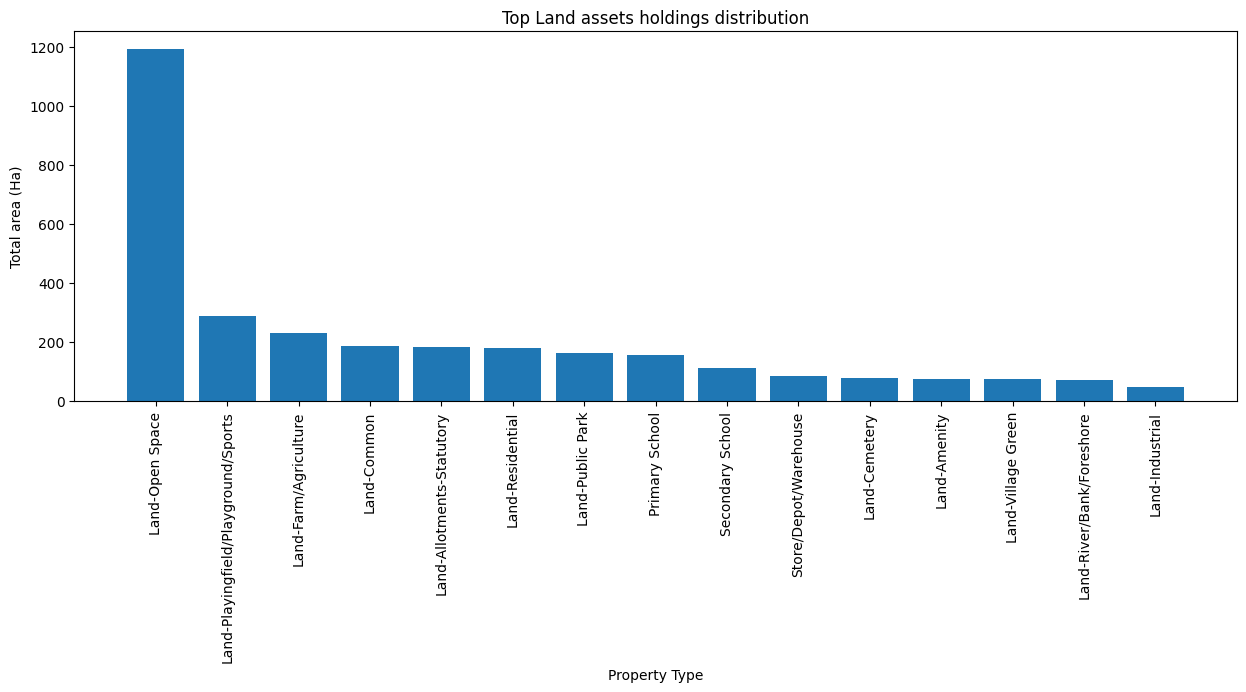

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure().set_figwidth(15)
plt.title('Top Land assets holdings distribution')
plt.xlabel('Property Type')
plt.xticks(rotation=90)
plt.ylabel('Total area (Ha)')
plt.bar(propertytypes['Property Type'],propertytypes['Sum'])

# Problem 5
For each of these grouped properties, what are the numbers of properties in each ‘tenure type’ recorded?

In [6]:
%%sql
SELECT `Property Type`, `Tenure Type`, COUNT(*) AS Count
FROM BristolCouncilAssets 
GROUP BY `Tenure Type`, `Property Type` 
ORDER BY `Property Type` DESC

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

,Property Type,Tenure Type,Count
0,Youth Club/Centre,Freehold,6
1,Youth Club/Centre,Leasehold,1
2,Underground Store,Freehold,3
3,Tunnel,Freehold,1
4,Tunnel,Maintenance Obligation,1
...,...,...,...
193,Bus Shelter,Freehold,5
194,Bridge/Pontoon,Freehold,17
195,Block/Blocks Of Flats,Freehold,1
196,Agricultural Buildings,Freehold,2
